<a href="https://colab.research.google.com/github/fernandofsilva/Keras/blob/main/The_Sequential_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
print(tf.__version__)

2.3.0


# The Sequential model API

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [4]:
# Build the Sequential feedforward neural network model
model = Sequential([
    Flatten(input_shape=(28, 28), name='Flatten'),
    Dense(16, activation='relu', name='Dense_1'), 
    Dense(16, activation='relu', name='Dense_2'), 
    Dense(16, activation='softmax', name='Softmax'),

])

In [5]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
Dense_1 (Dense)              (None, 16)                12560     
_________________________________________________________________
Dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
Softmax (Dense)              (None, 16)                272       
Total params: 13,104
Trainable params: 13,104
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [7]:
# Build the Sequential convolutional neural network model

model = Sequential([
    Conv2D(2, 3, activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((4, 4)),
    Flatten(name='Flatten'),
    Dense(10, activation='softmax')
])

In [8]:
# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 2)         20        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 6, 6, 2)           0         
_________________________________________________________________
Flatten (Flatten)            (None, 72)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                730       
Total params: 750
Trainable params: 750
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [9]:
# Define the model optimizer, loss function and metrics
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy')

In [10]:
# Print the resulting model attributes
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 2)         20        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 6, 6, 2)           0         
_________________________________________________________________
Flatten (Flatten)            (None, 72)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                730       
Total params: 750
Trainable params: 750
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_4"></a>
## The fit method

In [11]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [12]:
# Load the Fashion-MNIST dataset
fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [13]:
# Print the shape of the training data
train_images.shape

(60000, 28, 28)

In [14]:
# Define the labels
labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [15]:
# Rescale the image values so that they lie in between 0 and 1.
train_images = train_images / 255.
test_images = test_images / 255.

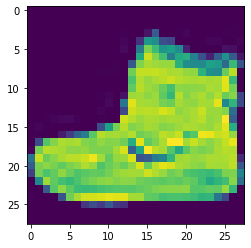

In [26]:
# Display one of the images
plt.imshow(train_images[0])
plt.show()

#### Fit the model

In [17]:
# Fit the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy', 'mae'])

#### Plot training history

In [27]:
# Load the history into a pandas Dataframe
history = model.fit(train_images[..., np.newaxis], train_labels, epochs=10, verbose=2)

Epoch 1/10
1875/1875 - 14s - loss: 0.4966 - accuracy: 0.8209 - mae: 4.4200
Epoch 2/10
1875/1875 - 14s - loss: 0.4840 - accuracy: 0.8265 - mae: 4.4200
Epoch 3/10
1875/1875 - 14s - loss: 0.4769 - accuracy: 0.8295 - mae: 4.4200
Epoch 4/10
1875/1875 - 14s - loss: 0.4725 - accuracy: 0.8323 - mae: 4.4200
Epoch 5/10
1875/1875 - 15s - loss: 0.4689 - accuracy: 0.8333 - mae: 4.4200
Epoch 6/10
1875/1875 - 14s - loss: 0.4672 - accuracy: 0.8346 - mae: 4.4200
Epoch 7/10
1875/1875 - 14s - loss: 0.4645 - accuracy: 0.8349 - mae: 4.4200
Epoch 8/10
1875/1875 - 14s - loss: 0.4640 - accuracy: 0.8352 - mae: 4.4200
Epoch 9/10
1875/1875 - 14s - loss: 0.4629 - accuracy: 0.8360 - mae: 4.4200
Epoch 10/10
1875/1875 - 14s - loss: 0.4618 - accuracy: 0.8357 - mae: 4.4200


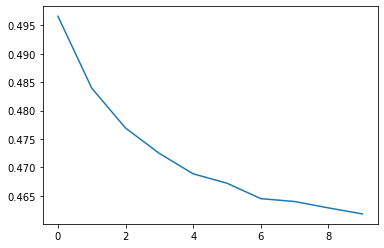

In [28]:
# Make a plot for the loss
df = pd.DataFrame(history.history)

plt.plot(df['loss'])
plt.show()

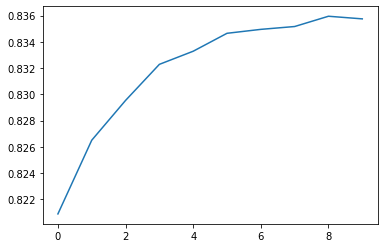

In [29]:
# Make a plot for the accuracy
plt.plot(df['accuracy'])
plt.show()

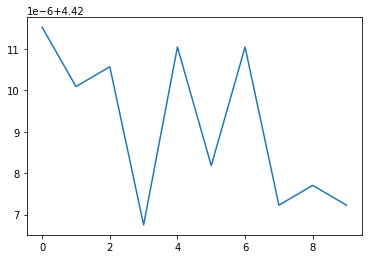

In [30]:
# Make a plot for the additional metric
plt.plot(df['mae'])
plt.show()

***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [31]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [32]:
# Evaluate the model
loss, acc, mae = model.evaluate(test_images[..., np.newaxis], test_labels, verbose=2)

313/313 - 1s - loss: 0.4926 - accuracy: 0.8205 - mae: 4.4200


#### Make predictions from the model

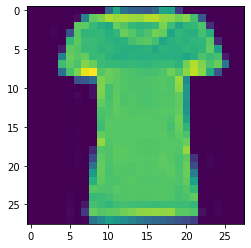

Label: T-shirt/top


In [33]:
# Choose a random test image
random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [34]:
# Get the model predictions
np.argmax(model.predict(test_image[np.newaxis, ..., np.newaxis]))

0